## Analyzing Top 5 Players Stats based on MVP's throughout the years 

Are MVP Winners changing over time, or do certain players consistently appear at the top?

Which player has had the most MVP's throughout the years? Which team?

Does the MVP winner throughout the years have a better or worst team?

Why has these player made MVP compared to the other Top 4 players?

What does the Top 5 Players have that other players dont?

In [2]:
import pandas as pd

import seaborn as sns 

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/Users/sa17/Desktop/nba-stats/data/player_stats/merge2000-2024.csv")

df

,Year,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
0,2011-2012,Kevin Durant,23.0,OKC,SF,66.0,66.0,2546.0,643.0,1297.0,...,527.0,231.0,88.0,77.0,248.0,133.0,1850.0,0.0,MVP-2ASNBA1,duranke01
1,2011-2012,LeBron James,27.0,MIA,SF,62.0,62.0,2326.0,621.0,1169.0,...,492.0,387.0,115.0,50.0,213.0,96.0,1683.0,0.0,MVP-1DPOY-4ASNBA1,jamesle01
2,2011-2012,Kobe Bryant,33.0,LAL,SG,58.0,58.0,2232.0,574.0,1336.0,...,313.0,264.0,69.0,18.0,204.0,105.0,1616.0,0.0,MVP-4ASNBA1,bryanko01
3,2011-2012,Russell Westbrook,23.0,OKC,PG,66.0,66.0,2331.0,578.0,1266.0,...,301.0,362.0,112.0,21.0,239.0,147.0,1558.0,0.0,MVP-12DPOY-18ASNBA2,westbru01
4,2011-2012,Kevin Love,23.0,MIN,PF,55.0,55.0,2145.0,474.0,1059.0,...,734.0,111.0,47.0,28.0,128.0,152.0,1432.0,0.0,MVP-6ASNBA2,loveke01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14681,2009-2010,Jason Hart,31.0,MIN,PG,1.0,0.0,5.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,hartja01
14682,2009-2010,Jason Hart,31.0,NOH,PG,4.0,0.0,17.0,1.0,1.0,...,2.0,5.0,1.0,1.0,3.0,4.0,2.0,0.0,NaN,hartja01
14683,2009-2010,JamesOn Curry,24.0,LAC,PG,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,curryja01
14684,2009-2010,Dwayne Jones,26.0,PHO,PF,2.0,0.0,7.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,jonesdw02


In [4]:
# Creating top 5 players dataframe using MVP1-5 and deleting any nan values 

player_df = pd.DataFrame(df)[["Year", "Player", "Team", "Pos", "G", "MP", "PTS", "TRB","AST", "STL", "BLK", "FG%", "3P%", "FT%", "Awards"]]

player_df = player_df.sort_values(by=["Year","Awards"])

player_df = player_df.dropna()

player_df = player_df[player_df["Awards"].str.contains(r"^MVP-[1-5](?!\d)")]  # ^MVP-[1-5]: Matches "MVP-" followed by a digit between 1 and 5 at the start of the string.
# (?!\d): This is a negative lookahead. It ensures that no additional digits follow after "MVP-1", "MVP-2", etc. It prevents matching strings like "MVP-10", "MVP-11", etc.

player_df

,Year,Player,Team,Pos,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,Awards
5046,2000-2001,Allen Iverson,PHI,SG,71.0,2979.0,2207.0,273.0,325.0,178.0,20.0,0.420,0.320,0.814,MVP-1DPOY-11ASNBA1
5057,2000-2001,Tim Duncan,SAS,PF,82.0,3174.0,1820.0,997.0,245.0,70.0,192.0,0.499,0.259,0.618,MVP-2DPOY-3ASNBA1
5047,2000-2001,Shaquille O'Neal,LAL,C,74.0,2924.0,2125.0,940.0,277.0,47.0,204.0,0.572,0.000,0.513,MVP-3DPOY-8ASNBA1
5053,2000-2001,Chris Webber,SAC,PF,70.0,2836.0,1898.0,777.0,294.0,93.0,118.0,0.481,0.071,0.703,MVP-4ASNBA1
5059,2000-2001,Kevin Garnett,MIN,PF,81.0,3202.0,1784.0,921.0,401.0,111.0,145.0,0.477,0.288,0.764,MVP-5DPOY-2ASNBA2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9239,2023-2024,Nikola Jokić,DEN,C,79.0,2737.0,2085.0,976.0,708.0,108.0,68.0,0.583,0.359,0.817,MVP-1CPOY-4ASNBA1
9236,2023-2024,Shai Gilgeous-Alexander,OKC,PG,75.0,2553.0,2254.0,415.0,465.0,150.0,67.0,0.535,0.353,0.874,MVP-2DPOY-7CPOY-3ASNBA1
9235,2023-2024,Luka Dončić,DAL,PG,70.0,2624.0,2370.0,647.0,686.0,99.0,38.0,0.487,0.382,0.786,MVP-3CPOY-6ASNBA1
9237,2023-2024,Giannis Antetokounmpo,MIL,PF,73.0,2567.0,2222.0,841.0,476.0,87.0,79.0,0.611,0.274,0.657,MVP-4DPOY-9CPOY-12ASNBA1


In [5]:
# Renaming rows where "Awards" column contains MVP 
player_df.loc[player_df["Awards"].str.contains("MVP-1", case=False), "Awards"] = "MVP-1"

player_df.loc[player_df["Awards"].str.contains("MVP-2", case=False), "Awards"] = "MVP-2"

player_df.loc[player_df["Awards"].str.contains("MVP-3", case=False), "Awards"] = "MVP-3"

player_df.loc[player_df["Awards"].str.contains("MVP-4", case=False), "Awards"] = "MVP-4"

player_df.loc[player_df["Awards"].str.contains("MVP-5", case=False), "Awards"] = "MVP-5"

player_df

,Year,Player,Team,Pos,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,Awards
5046,2000-2001,Allen Iverson,PHI,SG,71.0,2979.0,2207.0,273.0,325.0,178.0,20.0,0.420,0.320,0.814,MVP-1
5057,2000-2001,Tim Duncan,SAS,PF,82.0,3174.0,1820.0,997.0,245.0,70.0,192.0,0.499,0.259,0.618,MVP-2
5047,2000-2001,Shaquille O'Neal,LAL,C,74.0,2924.0,2125.0,940.0,277.0,47.0,204.0,0.572,0.000,0.513,MVP-3
5053,2000-2001,Chris Webber,SAC,PF,70.0,2836.0,1898.0,777.0,294.0,93.0,118.0,0.481,0.071,0.703,MVP-4
5059,2000-2001,Kevin Garnett,MIN,PF,81.0,3202.0,1784.0,921.0,401.0,111.0,145.0,0.477,0.288,0.764,MVP-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9239,2023-2024,Nikola Jokić,DEN,C,79.0,2737.0,2085.0,976.0,708.0,108.0,68.0,0.583,0.359,0.817,MVP-1
9236,2023-2024,Shai Gilgeous-Alexander,OKC,PG,75.0,2553.0,2254.0,415.0,465.0,150.0,67.0,0.535,0.353,0.874,MVP-2
9235,2023-2024,Luka Dončić,DAL,PG,70.0,2624.0,2370.0,647.0,686.0,99.0,38.0,0.487,0.382,0.786,MVP-3
9237,2023-2024,Giannis Antetokounmpo,MIL,PF,73.0,2567.0,2222.0,841.0,476.0,87.0,79.0,0.611,0.274,0.657,MVP-4


Are MVP Winners changing over time, or do certain players consistently appear at the top?


In [6]:
# Filter out only MVP winners 
mvp = player_df[player_df["Awards"] == "MVP-1"]

mvp


,Year,Player,Team,Pos,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,Awards
5046,2000-2001,Allen Iverson,PHI,SG,71.0,2979.0,2207.0,273.0,325.0,178.0,20.0,0.420,0.320,0.814,MVP-1
6293,2001-2002,Tim Duncan,SAS,PF,82.0,3329.0,2089.0,1042.0,307.0,61.0,203.0,0.508,0.100,0.799,MVP-1
11811,2002-2003,Tim Duncan,SAS,PF,81.0,3181.0,1884.0,1043.0,316.0,55.0,237.0,0.513,0.273,0.710,MVP-1
12869,2003-2004,Kevin Garnett,MIN,PF,82.0,3231.0,1987.0,1139.0,409.0,120.0,178.0,0.499,0.256,0.791,MVP-1
6850,2004-2005,Steve Nash,PHO,PG,75.0,2573.0,1165.0,249.0,861.0,74.0,6.0,0.502,0.431,0.887,MVP-1
8089,2005-2006,Steve Nash,PHO,PG,79.0,2796.0,1489.0,333.0,826.0,61.0,12.0,0.512,0.439,0.921,MVP-1
2471,2006-2007,Dirk Nowitzki,DAL,PF,78.0,2820.0,1916.0,693.0,263.0,52.0,62.0,0.502,0.416,0.904,MVP-1
11210,2007-2008,Kobe Bryant,LAL,SG,82.0,3192.0,2323.0,517.0,441.0,151.0,40.0,0.459,0.361,0.840,MVP-1
553,2008-2009,LeBron James,CLE,SF,81.0,3054.0,2304.0,613.0,587.0,137.0,93.0,0.489,0.344,0.780,MVP-1
14108,2009-2010,LeBron James,CLE,SF,76.0,2966.0,2258.0,554.0,651.0,125.0,77.0,0.503,0.333,0.767,MVP-1


In [7]:
# Count MVPs per player
mvp_count = mvp["Player"].value_counts()

mvp_count

Player
LeBron James             4
Nikola Jokić             3
Tim Duncan               2
Steve Nash               2
Stephen Curry            2
Giannis Antetokounmpo    2
Allen Iverson            1
Kevin Garnett            1
Dirk Nowitzki            1
Kobe Bryant              1
Derrick Rose             1
Kevin Durant             1
Russell Westbrook        1
James Harden             1
Joel Embiid              1
Name: count, dtype: int64

In [8]:
# Filter out players who have more than one MVP
multi_mvp_players = mvp_count[mvp_count > 1].index

multi_mvp_players

Index(['LeBron James', 'Nikola Jokić', 'Tim Duncan', 'Steve Nash',
       'Stephen Curry', 'Giannis Antetokounmpo'],
      dtype='object', name='Player')

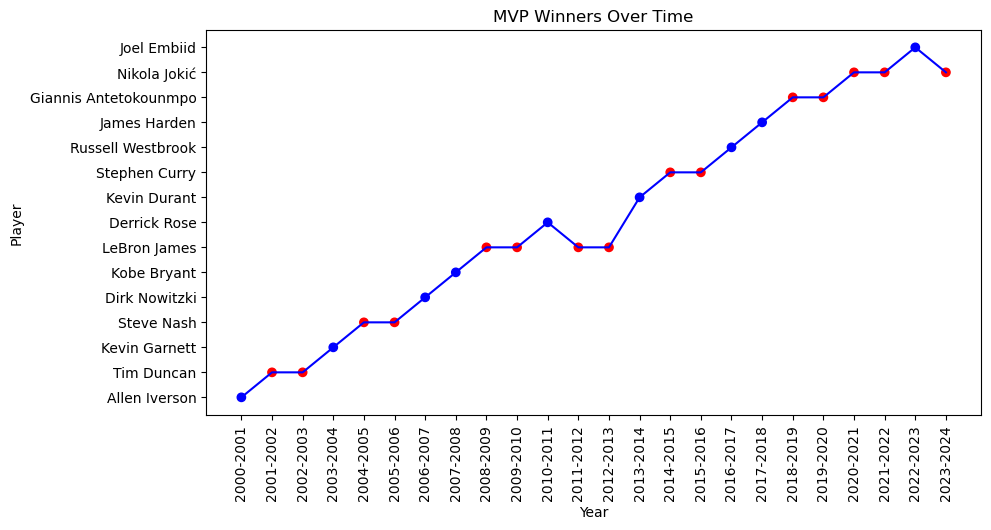

In [9]:
# Plot MVP Winners Over Time with Count
plt.figure(figsize=(10, 5))

# Assign colors: blue for all, red for multiple-time winners
colors = ['red' if player in multi_mvp_players else 'blue' for player in mvp["Player"]]

# Plot the full blue line
plt.plot(mvp["Year"], mvp["Player"], color='blue', linestyle='-')

# Overlay red markers on multiple-time winners
plt.scatter(mvp["Year"], mvp["Player"], color=colors)

plt.title("MVP Winners Over Time")
plt.xlabel("Year")
plt.ylabel("Player")
plt.xticks(rotation=90)
plt.show()


MVP winners are changing over time, but not constantly. While new names appear over the years, some players dominate multiple seasons.
For example, there are stretches where LeBron James, Stephen Curry, and Nikola Jokić appear multiple times, indicating periods of dominance.

Which player has had the most MVP's throughout the years? 

In [10]:
max_mvp = mvp_count.max()

max_mvp

4

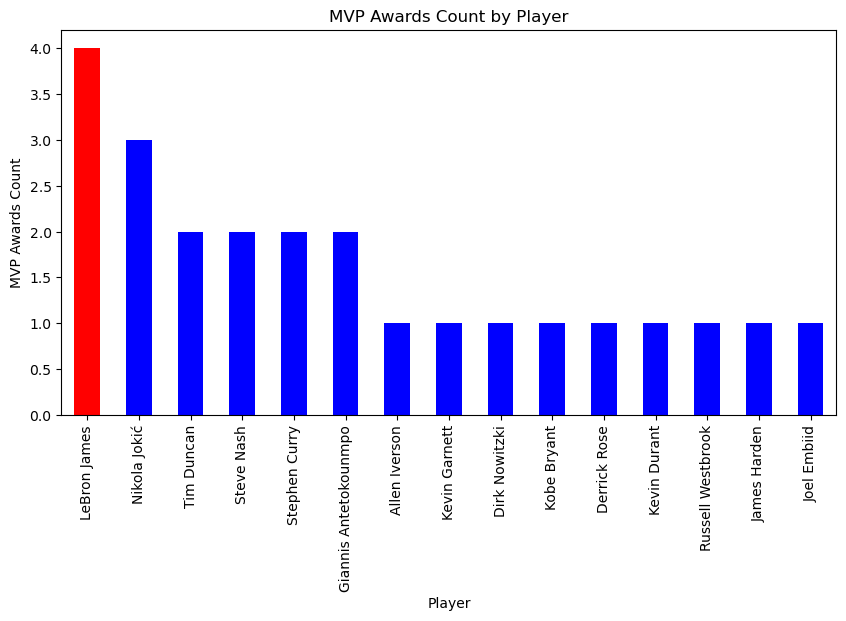

In [11]:

# Assign colors: Red for the max value, blue for others
colors = ['red' if count == max_mvp else 'blue' for count in mvp_count]

# Plot the bar chart
plt.figure(figsize=(10, 5))
mvp_count.plot(kind='bar', color=colors)
plt.title("MVP Awards Count by Player")
plt.xlabel("Player")
plt.ylabel("MVP Awards Count")
plt.xticks(rotation=90)
plt.show()


Lebron James has had the most MVP's throughout the years. He's the only person to have 4 MVP's!

Which team?

In [12]:
team_count = mvp.groupby(["Team", "Player"])["Awards"].count()

team_count

Team  Player               
CHI   Derrick Rose             1
CLE   LeBron James             2
DAL   Dirk Nowitzki            1
DEN   Nikola Jokić             3
GSW   Stephen Curry            2
HOU   James Harden             1
LAL   Kobe Bryant              1
MIA   LeBron James             2
MIL   Giannis Antetokounmpo    2
MIN   Kevin Garnett            1
OKC   Kevin Durant             1
      Russell Westbrook        1
PHI   Allen Iverson            1
      Joel Embiid              1
PHO   Steve Nash               2
SAS   Tim Duncan               2
Name: Awards, dtype: int64

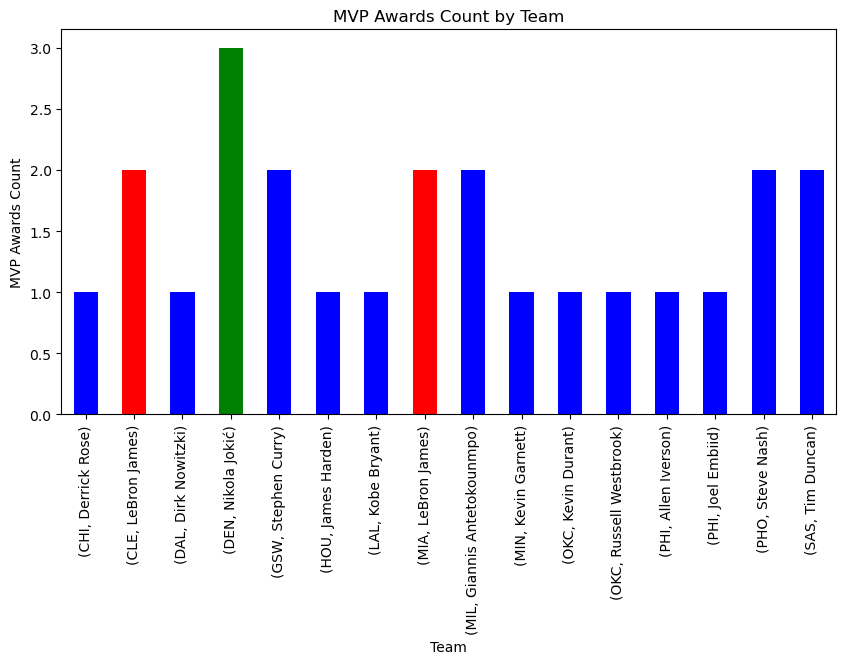

In [13]:
plt.figure(figsize=(10, 5))
colors = [
    "red" if player == "LeBron James" 
    else "green" if player == "Nikola Jokić" 
    else "blue" for _, player in team_count.index]
plt.title("MVP Awards Count by Team")
team_count.plot(kind='bar', color=colors)
plt.xlabel("Team")
plt.ylabel("MVP Awards Count")
plt.show()

Although LeBron James has the highest total number of MVP awards (4), these are split between two teams: the Cleveland Cavaliers and the Miami Heat. As a result, the team with the most MVP awards is the Denver Nuggets, with Nikola Jokić earning all 3!

Does the MVP winner throughout the years have a better or worst team?

In [48]:
team_df = pd.read_csv("/Users/sa17/Desktop/nba-stats/data/team_stats/merge2000-2024.csv")

team_df = team_df.sort_values(by="Year")

team_df = team_df.dropna()

team_df

,Year,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A
252,2000-2001,Miami Heat,E,A,50,32,0.610,2.29,101.88,99.39,2.49,1.72,101.67,99.81,1.87
264,2000-2001,New Jersey Nets,E,A,26,56,0.317,-5.05,100.78,106.41,-5.63,-5.30,100.86,106.77,-5.91
261,2000-2001,Boston Celtics,E,A,36,46,0.439,-2.13,102.41,104.80,-2.39,-2.40,102.45,105.14,-2.68
265,2000-2001,Atlanta Hawks,E,C,25,57,0.305,-5.21,99.51,105.17,-5.66,-5.55,99.38,105.43,-6.04
266,2000-2001,Washington Wizards,E,A,19,63,0.232,-6.67,101.43,108.65,-7.21,-6.75,101.62,108.93,-7.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,2023-2024,Los Angeles Lakers,W,P,47,35,0.573,0.60,116.69,116.21,0.47,1.07,117.00,116.04,0.95
464,2023-2024,Houston Rockets,W,SW,41,41,0.500,1.12,115.34,114.22,1.12,1.24,115.40,114.17,1.23
463,2023-2024,Orlando Magic,E,SE,47,35,0.573,2.02,114.36,112.26,2.10,1.48,113.95,112.40,1.55
470,2023-2024,Utah Jazz,W,NW,31,51,0.378,-4.89,116.38,121.39,-5.01,-4.22,116.85,121.18,-4.33


In [49]:
# Merge MVP and Team dataset
mvp_team_stats = pd.merge(mvp, team_df, on="Year", how="outer")

mvp_team_stats

,Year,Player,Team_x,Pos,G,MP,PTS,TRB,AST,STL,...,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A
0,2000-2001,Allen Iverson,PHI,SG,71.0,2979.0,2207.0,273.0,325.0,178.0,...,32,0.610,2.29,101.88,99.39,2.49,1.72,101.67,99.81,1.87
1,2000-2001,Allen Iverson,PHI,SG,71.0,2979.0,2207.0,273.0,325.0,178.0,...,56,0.317,-5.05,100.78,106.41,-5.63,-5.30,100.86,106.77,-5.91
2,2000-2001,Allen Iverson,PHI,SG,71.0,2979.0,2207.0,273.0,325.0,178.0,...,46,0.439,-2.13,102.41,104.80,-2.39,-2.40,102.45,105.14,-2.68
3,2000-2001,Allen Iverson,PHI,SG,71.0,2979.0,2207.0,273.0,325.0,178.0,...,57,0.305,-5.21,99.51,105.17,-5.66,-5.55,99.38,105.43,-6.04
4,2000-2001,Allen Iverson,PHI,SG,71.0,2979.0,2207.0,273.0,325.0,178.0,...,63,0.232,-6.67,101.43,108.65,-7.21,-6.75,101.62,108.93,-7.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,2023-2024,Nikola Jokić,DEN,C,79.0,2737.0,2085.0,976.0,708.0,108.0,...,35,0.573,0.60,116.69,116.21,0.47,1.07,117.00,116.04,0.95
712,2023-2024,Nikola Jokić,DEN,C,79.0,2737.0,2085.0,976.0,708.0,108.0,...,41,0.500,1.12,115.34,114.22,1.12,1.24,115.40,114.17,1.23
713,2023-2024,Nikola Jokić,DEN,C,79.0,2737.0,2085.0,976.0,708.0,108.0,...,35,0.573,2.02,114.36,112.26,2.10,1.48,113.95,112.40,1.55
714,2023-2024,Nikola Jokić,DEN,C,79.0,2737.0,2085.0,976.0,708.0,108.0,...,51,0.378,-4.89,116.38,121.39,-5.01,-4.22,116.85,121.18,-4.33



Why has these players made MVP compared to the other 4 players?

What does the Top 5 Players have that other players dont?